# Задача 1. Минимизация гладкой функции

Используя метод градиентного спуска и меняя выбор начальных приближений изучим поведение алгоритма и в какие минимумы он нас приведет. Для этого используем модуль scipy.optimize

In [28]:
import numpy as np
from scipy.optimize import minimize, differential_evolution 
import math
import matplotlib.pyplot as plt
# дана функция. Пусть ее область определения [1,30]
def f(x):
    return np.array(math.sin(x[0] / 5) * math.exp(x[0] / 10) + 5 * math.exp(-(x[0]) / 2))

In [11]:
# вычислим для примера значение функции в точке 0
f(0)

array(5.)

In [22]:
# начальное приближение сделаем равным 2
minimize(f, [2], method = 'BFGS')

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

In [31]:
# начальное приближение сделаем равным 30
minimize(f, [30], method = 'BFGS')

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

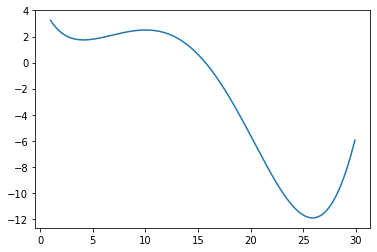

In [19]:
# построим простейший график
%matplotlib inline
x = np.arange(1,30,0.1)
y = np.array([f(i) for i in x])
plt.plot(x,y);

В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные. Что при начальном приближении х=2 мы попадаем в первый локальный минимум 4.13, а при начальном приближении х=30 мы попадаем в минимум при х = 25.9

# Задача 2. Глобальная оптимизация

Теперь используем метод глобальной оптимизации для негладких функций. Оптимизацию методом диффиренциальной эволюции.

In [32]:
differential_evolution(f,bounds = [(1, 30)])

     fun: array(-11.89889467)
     jac: array([7.99360578e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.8802067])

Как мы видим, данный алгоритм сразу нашел глобальный минимум на данном отрезке для нашей функции. При повторных запусках дифференциальной эволюции количество итераций менятся, но в этом примере, оно всегда будет сравнимым с количеством итераций `BFGS`. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в `BFGS`. Например, можно обратить внимание на количество вычислений значения функции `nfev` и увидеть, что у `BFGS` оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

# Задача 3. Минимизация негладкой функции

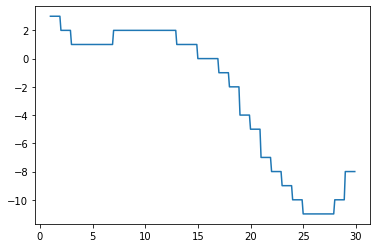

In [37]:
# Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке. Причем значения х тоже сделаем целыми
def h(x):
    return int(f([int(x[0])]))
x = np.arange(1,30,0.1)
y = np.array([h([i]) for i in x])
plt.plot(x,y);

In [39]:
# сначала давайте попробуем найти минимум используя градиентный спуск
minimize(h, [30], method = 'BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [40]:
# теперь давайте найдем минимум с помощью дифференциальной эволюции
differential_evolution(h,bounds = [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([26.89938042])

Мы видим что метод глобальной оптимизации такой, как дифференциальная эволюция можно использовать как для гладких так и для негладких функций. Значение же полученой от градиентного метода логически очевидное. Дело в том, что производная от прямой линии(константы) есть 0. И видим, что для нахождения "оптимального" минимума алгоритму понадобилось 0 шагов.

In [43]:
round(-11.8988,2)

-11.9